In [10]:
pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


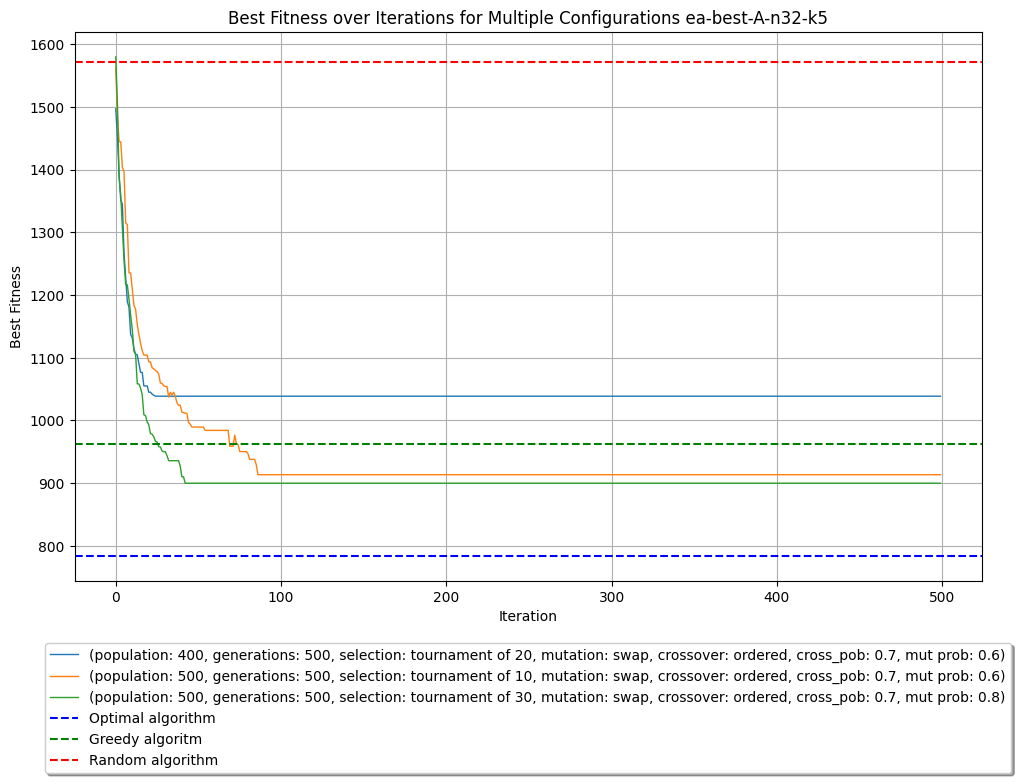

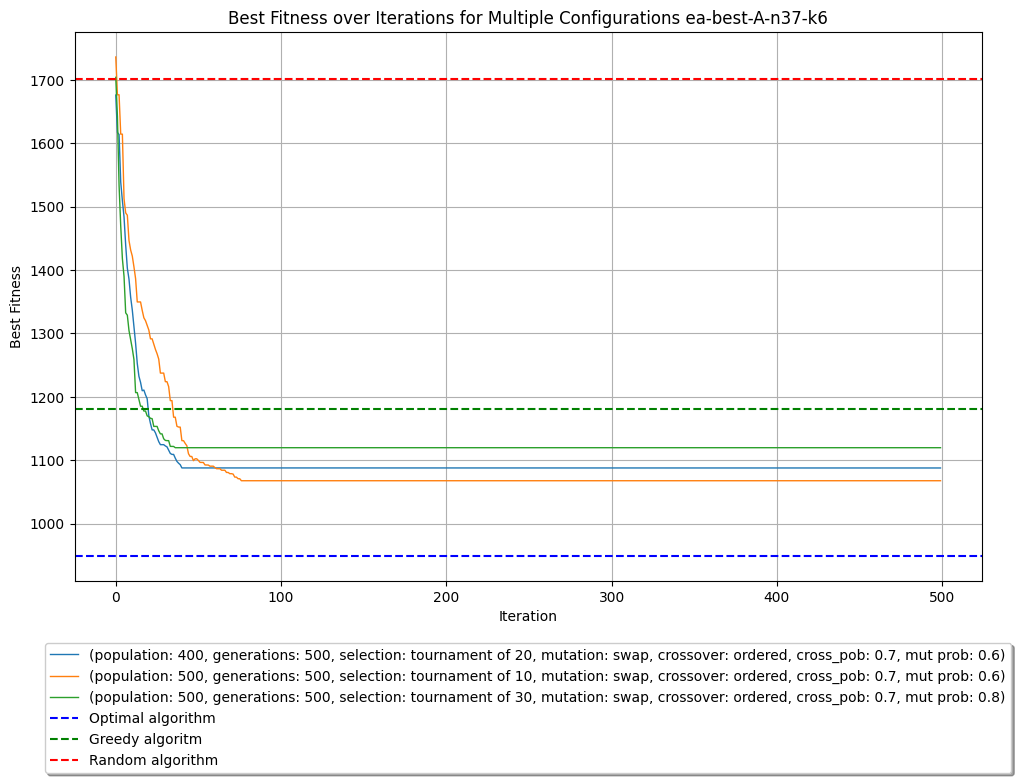

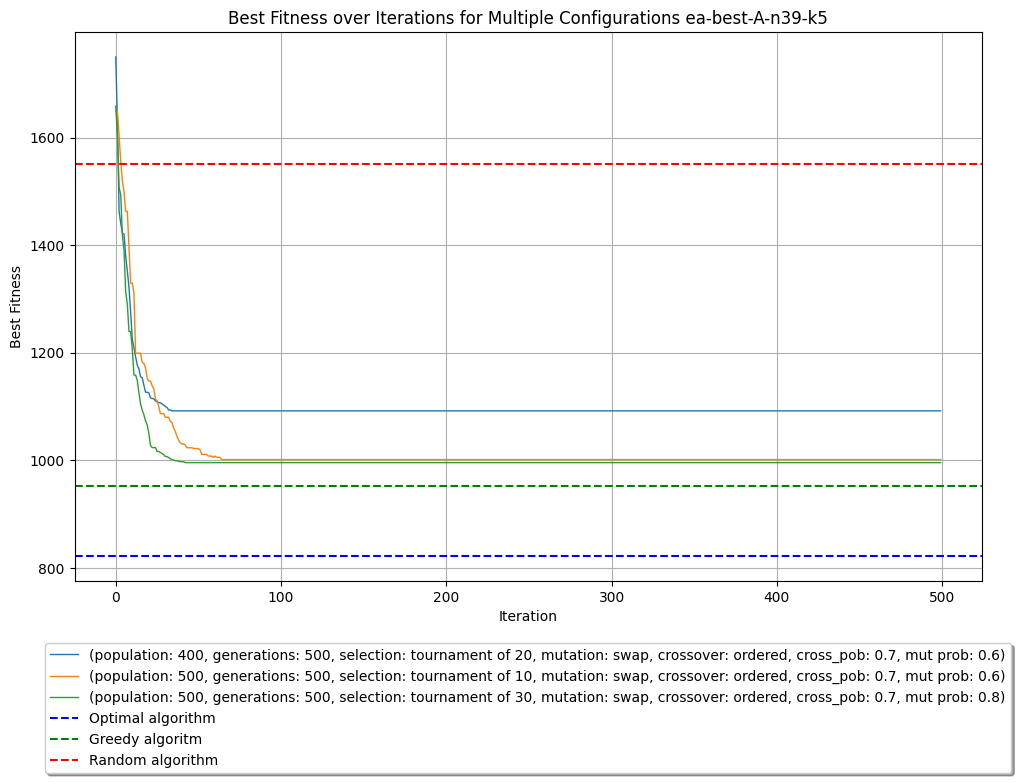

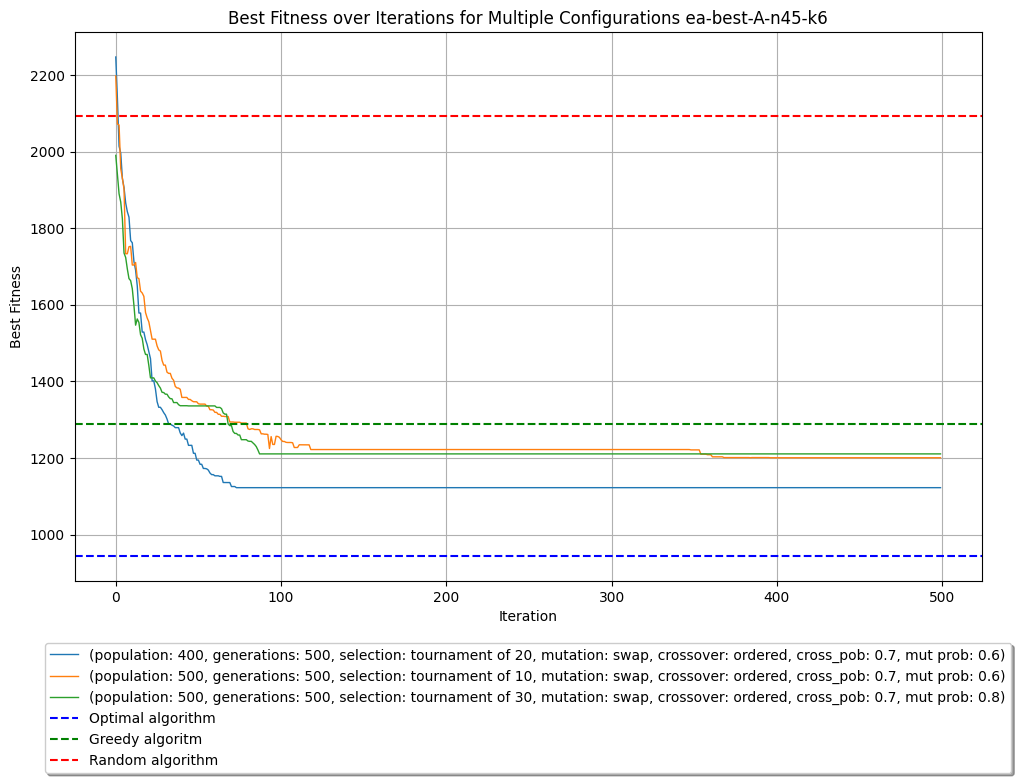

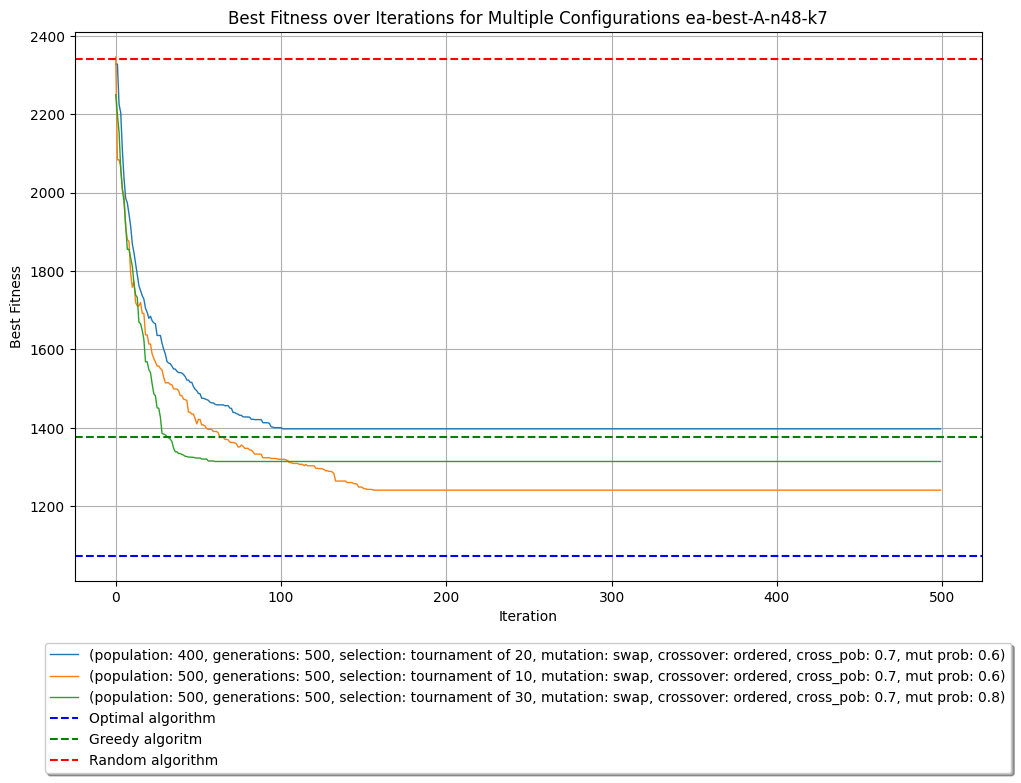

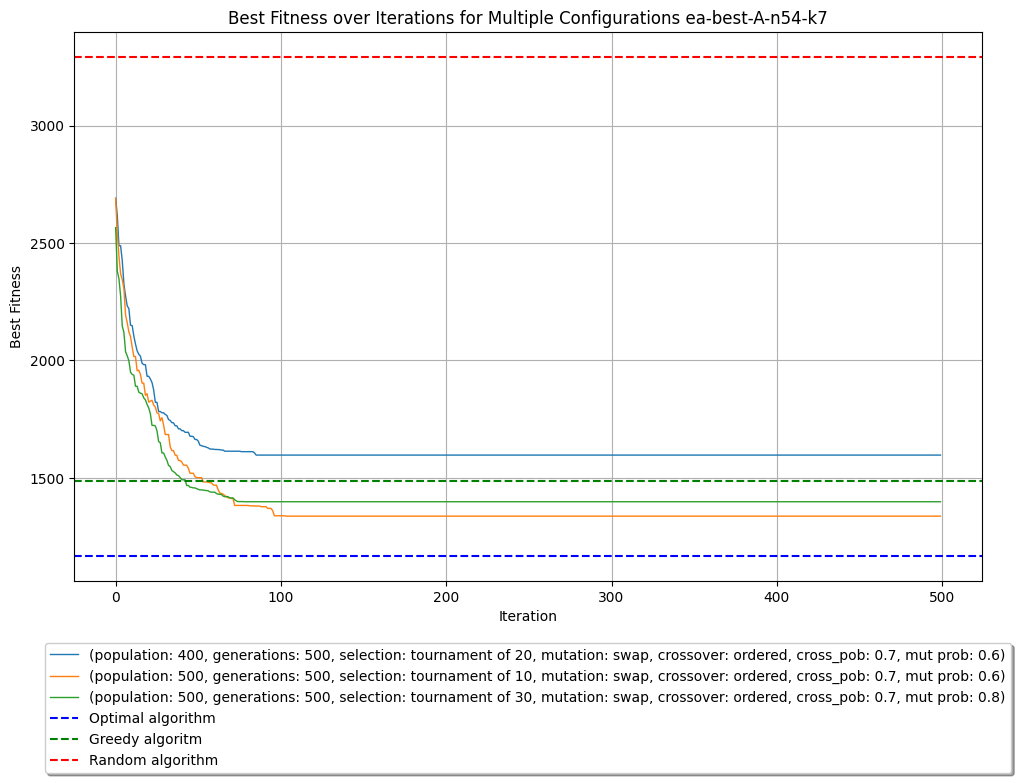

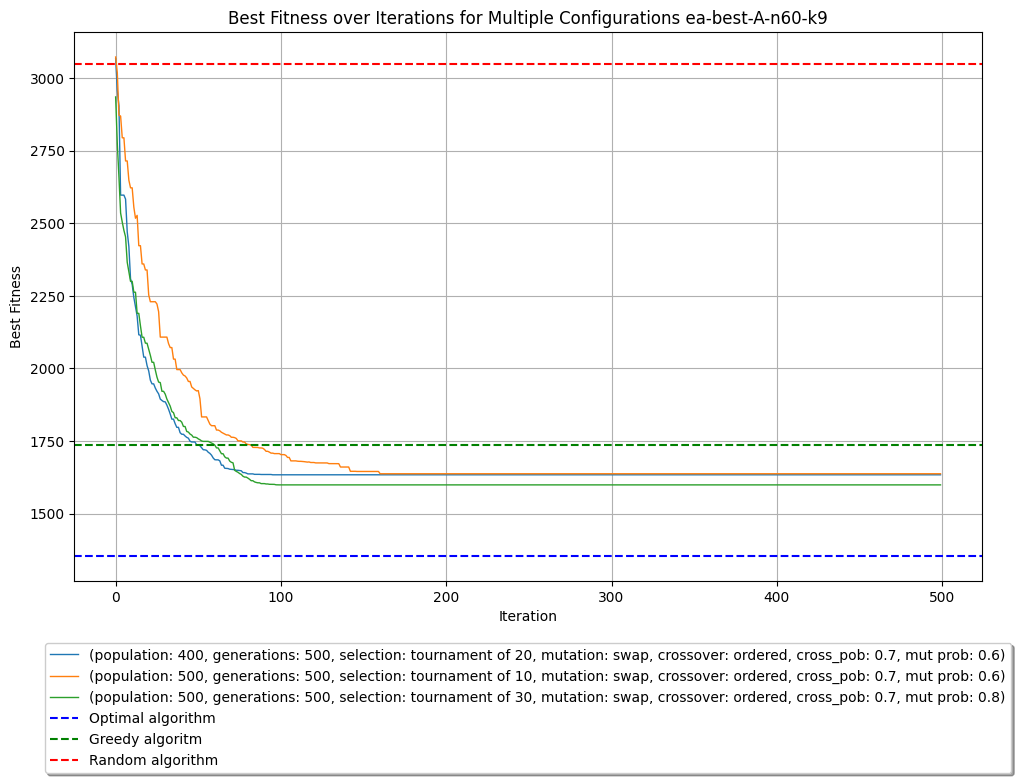

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# List of CSV file paths or a directory containing CSV files
# csv_files = {
#     'ea-precise-A-n32-k5': {
#         'greedy':962,
#         'random': 1572,
#         'optimal': 784
#     },
#     'ea-precise-A-n37-k6':{
#         'greedy':1181,
#         'random': 1701,
#         'optimal': 949
#     },
#     'ea-precise-A-n39-k5':{
#         'greedy':953,
#         'random': 1550,
#         'optimal': 822,
#     },
#     'ea-precise-A-n45-k6':{
#         'greedy':1288,
#         'random': 2093,
#         'optimal': 944
#     },
#     'ea-precise-A-n48-k7':{
#         'greedy':1259,
#         'random': 2342,
#         'optimal': 1073,
#     },
#     'ea-precise-A-n54-k7':{
#         'greedy':1485,
#         'random': 3292,
#         'optimal': 1167,
#     },
#     'ea-precise-A-n60-k9':{
#         'greedy':1735,
#         'random': 3050,
#         'optimal': 1354
#     },
# }
csv_files = {
    'ea-best-A-n32-k5': {
        'greedy':962,
        'random': 1572,
        'optimal': 784
    },
    'ea-best-A-n37-k6':{
        'greedy':1181,
        'random': 1701,
        'optimal': 949
    },
    'ea-best-A-n39-k5':{
        'greedy':953,
        'random': 1550,
        'optimal': 822,
    },
    'ea-best-A-n45-k6':{
        'greedy':1288,
        'random': 2093,
        'optimal': 944
    },
    'ea-best-A-n48-k7':{
        'greedy':1377,
        'random': 2342,
        'optimal': 1073,
    },
    'ea-best-A-n54-k7':{
        'greedy':1485,
        'random': 3292,
        'optimal': 1167,
    },
    'ea-best-A-n60-k9':{
        'greedy':1735,
        'random': 3050,
        'optimal': 1354
    },
}
# Alternatively, if you have a directory
# csv_directory = 'path_to_your_directory'
# csv_files = [os.path.join(csv_directory, f) for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Create a figure for plotting

# Loop through each CSV file and plot the data
for csv_file_path in csv_files.keys():

    plt.figure(figsize=(12, 8))

    # Read the CSV data into a pandas DataFrame
    df = pd.read_csv(csv_file_path, sep=";")

    # Group by 'configuration' and plot
    for config, group in df.groupby('configuration'):
        #plt.scatter(group['iteration'], group['best_fitness'], label=f'({config})', marker='o')
        plt.plot(group['generation'], group['best_fitness'], label=f'({config})', linestyle='-', linewidth=1)
        #plt.plot(group['iteration'], group['best_fitness'], label=f'({config})', marker='o', markersize=3, linestyle='-', linewidth=0.3)

    #plt.plot()
    plt.axhline(y=csv_files[csv_file_path]["optimal"], color='blue', linestyle='--', label=f'Optimal algorithm')
    plt.axhline(y=csv_files[csv_file_path]["greedy"], color='green', linestyle='--', label=f'Greedy algoritm')
    plt.axhline(y=csv_files[csv_file_path]["random"], color='red', linestyle='--', label=f'Random algorithm')
# Add titles and labels
    plt.title(f'Best Fitness over Iterations for Multiple Configurations {csv_file_path}')
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness')

# Move the legend to the right of the plot
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)
# Show grid
    plt.grid(True)

# Adjust layout to make room for the legend on the right
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin to fit the legend

# Show the plot
    plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('comparisons-sa.csv', sep=";")

# Set the instance number as the index
df.set_index('Instance', inplace=True)

# Define algorithms and their corresponding metrics
algorithms = ['Random', 'Greedy', 'Evolutionary', 'Tabu', 'SA']
metrics = ['best', 'worst', 'avg', 'std']

# Loop through each instance and create a separate chart
for index, row in df.iterrows():
    # Prepare data for the current instance
    plot_data = {}
    
    # Group results by algorithm for the current row
    for algo in algorithms:
        algo_data = {}
        for metric in metrics:
            column_name = f"{algo}: {metric}"
            algo_data[metric] = row[column_name]
        plot_data[algo] = algo_data

    # Convert to DataFrame for easier plotting
    plot_df = pd.DataFrame(plot_data)

    # Create a bar plot
    ax = plot_df.plot(kind='bar', figsize=(10, 5), width=0.8)

    # Customize the plot
    ax.set_title(f'Performance Comparison for Instance {index.split("/")[-1][:-3]}', fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)
    ax.set_xlabel('Category', fontsize=14)
    plt.xticks(rotation=0)

    # Show the values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9)

    # Show the plot
    plt.tight_layout()
    plt.show()

TypeError: no numeric data to plot

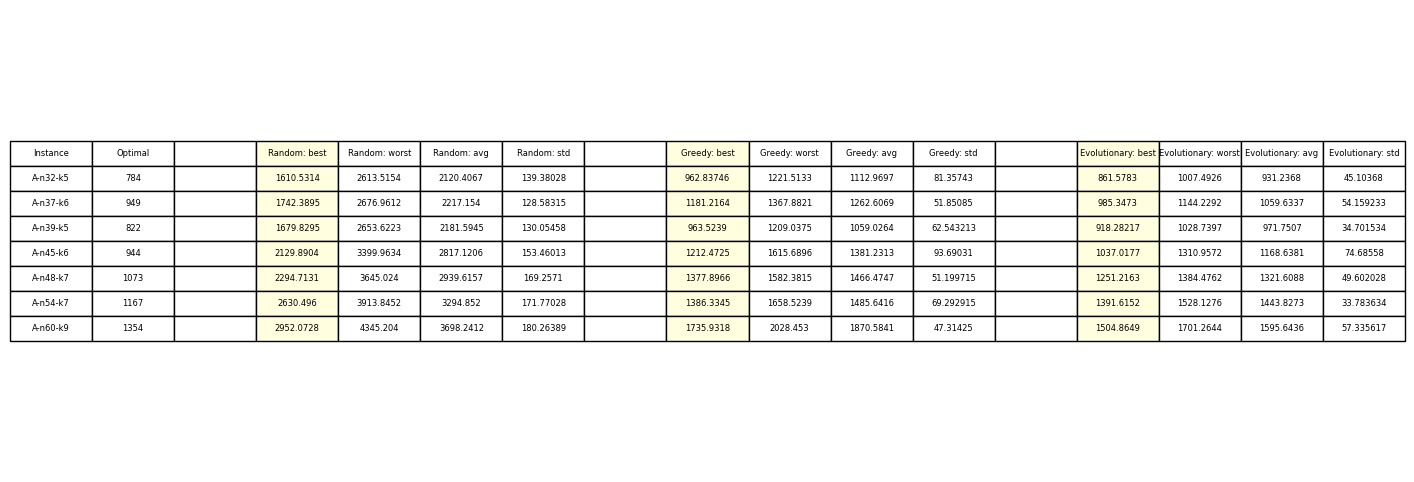

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

# Load the data
df = pd.read_csv('comparisons-sa.csv', sep=";")

# Extract only the last part after "/" in the "Instance" column, if it exists
if 'Instance' in df.columns:
    df['Instance'] = df['Instance'].str.split('/').str[-1]

# Predefined optimal values
predefined_values = [784, 949, 822, 944, 1073, 1167, 1354]
df['Optimal'] = predefined_values

# Define groups
groups = {
    "Random": df.loc[:, df.columns.str.contains("Random")].copy(),
    "Greedy": df.loc[:, df.columns.str.contains("Greedy")].copy(),
    "Evolutionary": df.loc[:, df.columns.str.contains("Evolutionary")].copy()
}

# Combine Instance, Optimal, and groups into one DataFrame
separator = pd.DataFrame({f" ": [""] * len(df)})  # Blank column for separation
combined_df = df[["Instance", "Optimal"]]  # Start with Instance and Optimal

for group_name, group_df in groups.items():
    if not group_df.empty:
        # Remove redundant prefixes and format columns
        group_df.columns = [col.replace(f"{group_name} ", "") for col in group_df.columns]
        # Add group name as the first row for headers (not repeated for each column)
        group_df.columns = [f"{col}" if col else group_name for col in group_df.columns]
        combined_df = pd.concat([combined_df, separator, group_df], axis=1)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Reduced figure size for a concise display

# Hide axes
ax.axis('tight')
ax.axis('off')

# Convert DataFrame to list for table data
table_data = combined_df.values.tolist()

# Create the table and add it to the axes
table = ax.table(cellText=table_data, colLabels=combined_df.columns, cellLoc='center', loc='center')

# Adjust table styling for a concise display
table.auto_set_font_size(False)
table.set_fontsize(6)  # Smaller font size
table.scale(1.8, 1.5)  # Reduced scaling for tighter spacing

# Highlight columns with "best" in the column name
highlight_color = colors.to_rgba("lightyellow")  # Light yellow background
for j, col_name in enumerate(combined_df.columns):
    if "best" in col_name.lower():  # Check if "best" is in column name
        for i in range(len(table_data) + 1):  # +1 to include the header row
            cell = table[i, j]
            cell.set_facecolor(highlight_color)

# Show the table
plt.show()

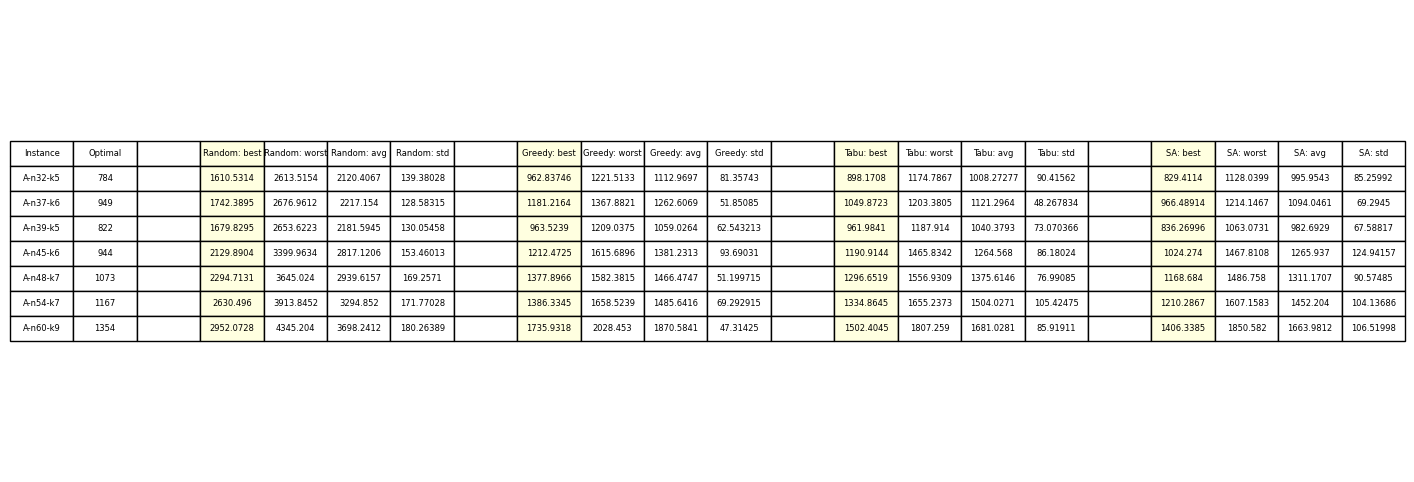

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

# Load the data
df = pd.read_csv('comparisons-sa.csv', sep=";")

# Extract only the last part after "/" in the "Instance" column, if it exists
if 'Instance' in df.columns:
    df['Instance'] = df['Instance'].str.split('/').str[-1]

# Predefined optimal values
predefined_values = [784, 949, 822, 944, 1073, 1167, 1354]
df['Optimal'] = predefined_values

# Define groups
groups = {
    "Random": df.loc[:, df.columns.str.contains("Random")].copy(),
    "Greedy": df.loc[:, df.columns.str.contains("Greedy")].copy(),
    "Tabu": df.loc[:, df.columns.str.contains("Tabu")].copy(),
    "SA": df.loc[:, df.columns.str.contains("SA")].copy()
}

# Combine Instance, Optimal, and groups into one DataFrame
separator = pd.DataFrame({f" ": [""] * len(df)})  # Blank column for separation
combined_df = df[["Instance", "Optimal"]]  # Start with Instance and Optimal

for group_name, group_df in groups.items():
    if not group_df.empty:
        # Remove redundant prefixes and format columns
        group_df.columns = [col.replace(f"{group_name} ", "") for col in group_df.columns]
        # Add group name as the first row for headers (not repeated for each column)
        group_df.columns = [f"{col}" if col else group_name for col in group_df.columns]
        combined_df = pd.concat([combined_df, separator, group_df], axis=1)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # Reduced figure size for a concise display

# Hide axes
ax.axis('tight')
ax.axis('off')

# Convert DataFrame to list for table data
table_data = combined_df.values.tolist()

# Create the table and add it to the axes
table = ax.table(cellText=table_data, colLabels=combined_df.columns, cellLoc='center', loc='center')

# Adjust table styling for a concise display
table.auto_set_font_size(False)
table.set_fontsize(6)  # Smaller font size
table.scale(1.8, 1.5)  # Reduced scaling for tighter spacing

# Highlight columns with "best" in the column name
highlight_color = colors.to_rgba("lightyellow")  # Light yellow background
for j, col_name in enumerate(combined_df.columns):
    if "best" in col_name.lower():  # Check if "best" is in column name
        for i in range(len(table_data) + 1):  # +1 to include the header row
            cell = table[i, j]
            cell.set_facecolor(highlight_color)

# Show the table
plt.show()